# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
X_st = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [36]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8)
clusters = kmeans.fit(X)

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
len(clusters.cluster_centers_)

8

In [38]:
clusters.cluster_centers_[7]

array([1.313500e+01, 2.833750e+00, 2.338125e+00, 1.880625e+01,
       1.090000e+02, 2.163750e+00, 1.720625e+00, 3.643750e-01,
       1.635625e+00, 5.208125e+00, 9.325000e-01, 2.550000e+00,
       7.466875e+02])

In [39]:
dict(zip(X, clusters.cluster_centers_[0]))  # prototipo del primer cluster

{'alcohol': 12.992666666666667,
 'malic_acid': 2.3766666666666665,
 'ash': 2.458,
 'alcalinity_of_ash': 19.966666666666665,
 'magnesium': 111.8,
 'total_phenols': 2.274,
 'flavanoids': 1.9106666666666667,
 'nonflavanoid_phenols': 0.35333333333333333,
 'proanthocyanins': 1.6686666666666667,
 'color_intensity': 5.300666666666666,
 'hue': 0.9090666666666667,
 'od280/od315_of_diluted_wines': 2.6366666666666667,
 'proline': 870.1999999999999}

In [40]:
preds = clusters.fit_predict(X)

preds[:80]

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 7, 1, 6, 4, 6, 1, 1, 7, 7, 6, 1, 1, 7, 6, 1, 1, 7, 6, 2, 4, 4,
       7, 7, 2, 2, 1, 1, 2, 7, 1, 6, 7, 1, 7, 2, 2, 7, 7, 4, 2, 7, 7, 4,
       2, 7, 7, 7, 7, 1, 7, 1, 1, 1, 7, 7, 7, 1, 1, 5, 4, 5, 0, 3, 3, 4,
       5, 5, 4, 4, 2, 3, 5, 7, 2, 5, 3, 5, 4, 5], dtype=int32)

In [41]:
distancias = clusters.fit_transform(X)

len(distancias)

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


178

In [42]:
y_pred=kmeans.predict(X)
y_pred

array([1, 1, 5, 3, 4, 3, 5, 5, 1, 1, 3, 5, 5, 1, 3, 5, 5, 1, 3, 6, 4, 4,
       1, 1, 6, 6, 5, 5, 6, 1, 5, 3, 1, 5, 1, 6, 6, 1, 1, 4, 6, 1, 1, 4,
       6, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 5, 5, 7, 4, 7, 2, 0, 0, 4,
       7, 7, 4, 4, 6, 0, 7, 1, 6, 0, 0, 7, 4, 7, 0, 4, 2, 7, 7, 7, 7, 2,
       4, 2, 7, 7, 7, 0, 0, 6, 2, 0, 4, 0, 4, 2, 7, 0, 4, 0, 7, 7, 0, 4,
       2, 0, 2, 7, 0, 0, 7, 0, 0, 2, 2, 7, 0, 0, 0, 0, 0, 7, 0, 2, 2, 7,
       2, 2, 2, 4, 4, 7, 2, 2, 2, 4, 7, 2, 6, 6, 0, 2, 2, 2, 7, 7, 0, 4,
       2, 4, 7, 6, 4, 2, 7, 4, 2, 4, 2, 7, 4, 4, 4, 2, 7, 7, 4, 4, 4, 6,
       6, 2], dtype=int32)

In [43]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y_pred)

0.5406824747857603

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [44]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
y_pred=kmeans.predict(X)
silhouette_score(X, y_pred)

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [45]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)
silhouette_score(X, y_pred)

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [46]:
from sklearn.cluster import KMeans

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

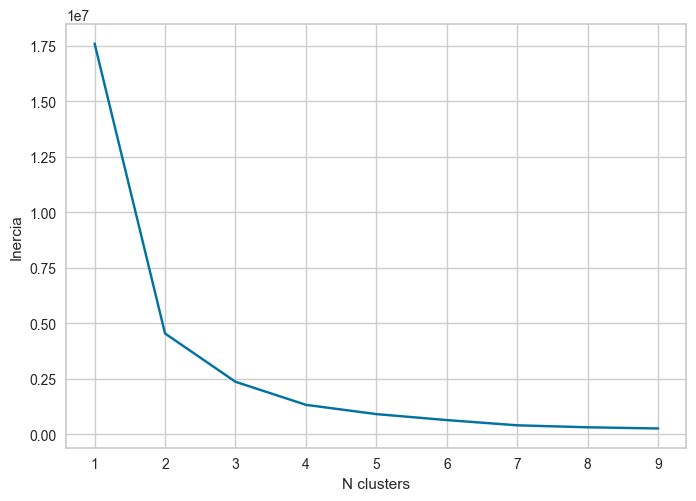

In [47]:

n_clusters, inertia = zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inertia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

Note: you may need to restart the kernel to use updated packages.


/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

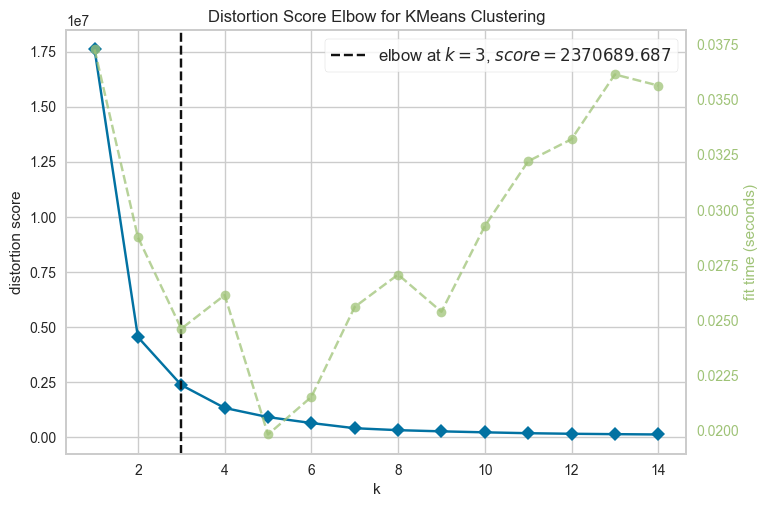

In [48]:
%pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans()

visual = KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

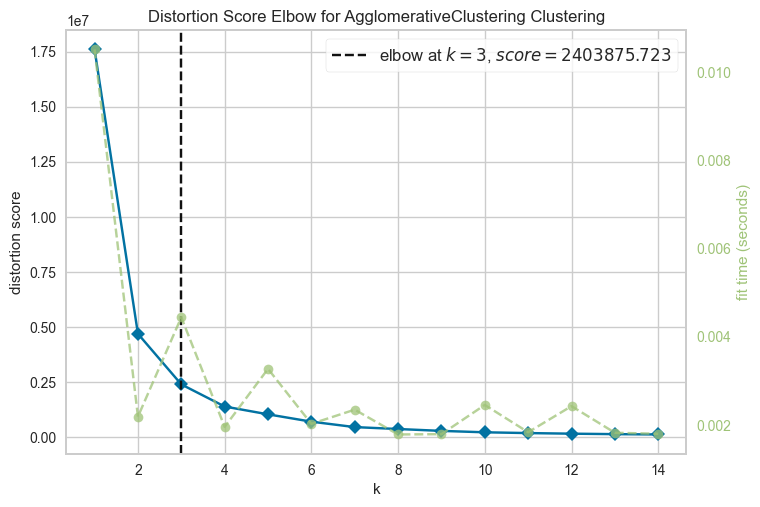

In [49]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering()
visual = KElbowVisualizer(modelo, k=(1, 15), metric='distortion')
visual.fit(X)

visual.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

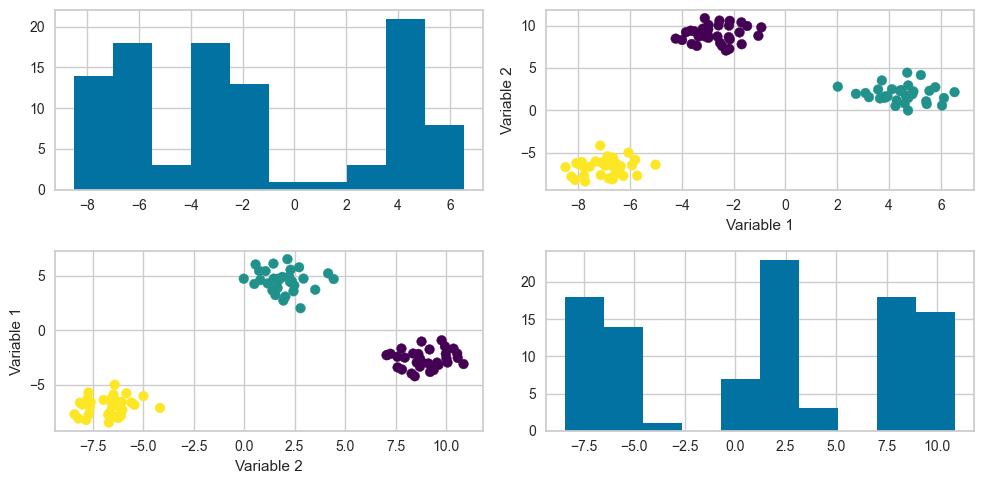

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

fig, axs = plt.subplots(X.shape[1], X.shape[1], figsize=(10, 5))

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if i == j:
            axs[i, j].hist(X[:, i], bins=10)
        else:
            axs[i, j].scatter(X[:, i], X[:, j], c=y, cmap='viridis')
            axs[i, j].set_xlabel(f'Variable {i+1}')
            axs[i, j].set_ylabel(f'Variable {j+1}')

plt.tight_layout()
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

/Users/joseluisreguera/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


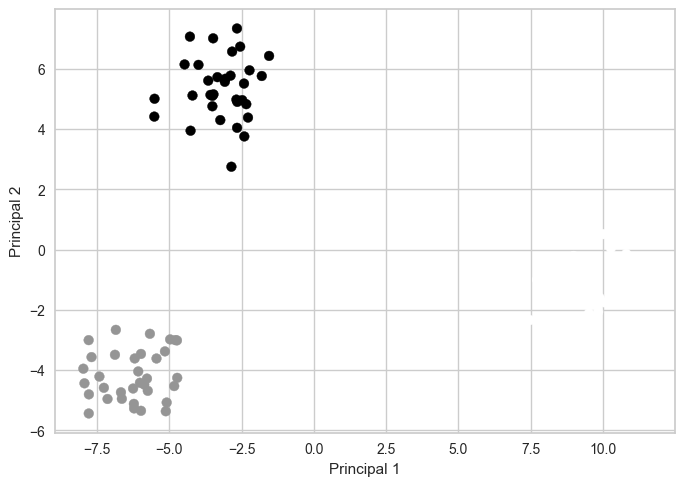

In [51]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

data_array = np.array(X)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_array)

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_array)

cluster_labels = kmeans.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [52]:
from sklearn.manifold import TSNE

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X_st)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='viridis')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();